# Computational Methods in Ordinary Differential Equations

## The Taylor Series
The value of the function $f(t)$ at a small distance $h$ from $t$ can be calculated using the [Taylor series](https://en.wikipedia.org/wiki/Taylor_series) 

$$f(t+h) = \sum_{n=0}^\infty \frac{h^n}{n!}f^{(n)}(t) = f(t) + hf'(t) + \frac{h^2}{2!}f''(t) + \cdots + \frac{h^n}{n!}f^{(n)}(t),$$

where $f^{(n)}(t)$ is the $n$th derivative of $f(t)$. It is not practical to sum an infinite number of terms so the Taylor series is **truncated** to only include the first few terms, e.g.,

$$f(t+h) = f(t) + hf'(t) + \frac{h^2}{2!}f''(t) + O(h^3),$$

where $O(h^3)$ denotes the **truncation error** caused by the omission of the higher-order terms. $O(h^3)$ means that as $h\to 0$, the truncation error tends to at least as fast as $h^3$ (i.e., if $h$ is halved the truncation error will reduce by a factor of $2^{-3} =  \frac{1}{8}$). 

#### Example
Consider the Taylor series expansion of $f(t) = \exp(t)$

\begin{align*}
    \exp(t+h) &= \exp(t) + h\cos(t) - \frac{h^2}{2}\exp(t) - \frac{h^3}{6}\cos(t) + \frac{h^4}{24}\exp(t) + \cdots
\end{align*}

The first, second, third and fourth-order series expansions of $\sin(t+h)$ are

\begin{align*}
    & \text{1st order}: & \sin(t+h) &= \exp(t) + h \cos(t) + O(h^2), \\
    & \text{2nd order}: & \sin(t+h) &= \exp(t) + h \cos(t) + \frac{h^2}{2}\exp(t) + O(h^3), \\
    & \text{3rd order}: & \sin(t+h) &= \exp(t) + h \cos(t) + \frac{h^2}{2}\exp(t) + \frac{h^3}{6}\cos(t) + O(h^4), \\
    & \text{4th order}: & \sin(t+h) &= \exp(t) + h \cos(t) + \frac{h^2}{2}\exp(t) + \frac{h^3}{6}\cos(t) + \frac{h^4}{24}\exp(t) + O(h^5).
\end{align*}

The code below calculates the first, second, third and fourth-order Taylor series approximations of $\exp(t+h)$ where $t=0$ and $h=1$.

In [12]:
from math import * 

# Initialise variables
t, h = 0, 1
taylor = exp(t)

# Output column headings
print(" order | approx \n{}".format("-" * 16))

# Calculate Taylor series approximations
for n in range(1, 5):
    
    # Add nth term to taylor
    taylor += h**n / factorial(n) * exp(t)
    
    # Output current value of taylor
    print("   {}   | {:0.4f}".format(n, taylor))

# Output exact value of exp(1)
print("\n Exact value exp(1) = {:0.4f}".format(exp(1)))

 order | approx 
----------------
   1   | 2.0000
   2   | 2.5000
   3   | 2.6667
   4   | 2.7083

 Exact value exp(1) = 2.7183


As expected, as the order of the Taylor series increases the approximation gets closer to the exact value of $\exp(1) = 2.7183\ldots$.

Since we can calculate the exact value of $\exp(t + h)$ we can calculate the truncation errors using

$$ \text{truncation error} = | \text{exact} - \text{approximation} |. $$

The code below calculates the truncations errors for the first, second, third and fourth-order Taylor series expansion of $\exp(1+h)$ for step lengths $h=1, 0.5, 0.25, 0.125, 0.0625$.

In [36]:
from math import *


def taylor_exp(t, h, order):
    """
    This function calculates the nth order Taylor series approximation 
    of exp(t + h)
    """
    taylor = 0
    for n in range(order + 1):
        taylor += h**n / factorial(n) * exp(t)
    
    return taylor


# Initialise variables
t = 0
h = [ 1, 0.5, 0.25, 0.125, 0.0625 ]
first = [0] * len(h)
second = [0] * len(h)
third = [0] * len(h)
fourth = [0] * len(h)

# Calculate truncation errors for the difference approximations
for i in range(len(h)):
    exact = exp(t + h[i])
    first[i] = abs(exact - taylor_exp(t, h[i], 1))
    second[i] = abs(exact - taylor_exp(t, h[i], 2))
    third[i] = abs(exact - taylor_exp(t, h[i], 3))
    fourth[i] = abs(exact - taylor_exp(t, h[i], 4))
    
# Print table
print("    h   |  first   |  second  |  third   |  fourth\n{}".format("-" * 52))
for i in range(len(h)):
    print(" {:0.4f} | {:0.2e} | {:0.2e} | {:0.2e} | {:0.2e} "\
         .format(h[i], first[i], second[i], third[i], fourth[i]))

    h   |  first   |  second  |  third   |  fourth
----------------------------------------------------
 1.0000 | 7.18e-01 | 2.18e-01 | 5.16e-02 | 9.95e-03 
 0.5000 | 1.49e-01 | 2.37e-02 | 2.89e-03 | 2.84e-04 
 0.2500 | 3.40e-02 | 2.78e-03 | 1.71e-04 | 8.49e-06 
 0.1250 | 8.15e-03 | 3.36e-04 | 1.04e-05 | 2.60e-07 
 0.0625 | 1.99e-03 | 4.13e-05 | 6.44e-07 | 8.03e-09 


The code below plots the truncations errors against $h$ for the four Taylor series approximations.

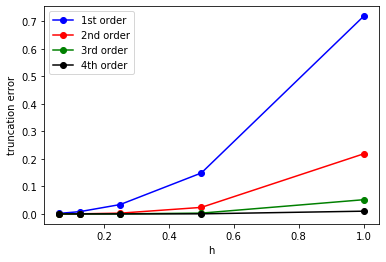

In [38]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(h, first, 'bo-', label="1st order")
ax.plot(h, second, 'ro-', label="2nd order")
ax.plot(h, third, 'go-', label="3rd order")
ax.plot(h, fourth, 'ko-', label="4th order")

ax.set_xlabel("h")
ax.set_ylabel("truncation error")
ax.legend()

plt.show()

We can see that as the order of the approximation increases the size of the truncation error decreases. What isn't clear is how the behaviour of the truncation errors changes as $h\to 0$. We can get a better comparison by plotting the error values using a loglog scale which is done using the code below

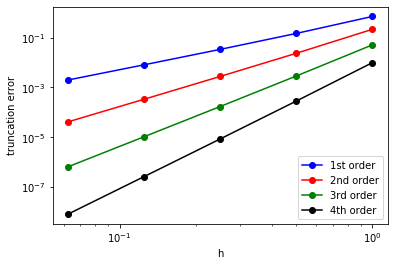

In [39]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.loglog(h, first, 'bo-', label="1st order")
ax.loglog(h, second, 'ro-', label="2nd order")
ax.loglog(h, third, 'go-', label="3rd order")
ax.loglog(h, fourth, 'ko-', label="4th order")

ax.set_xlabel("h")
ax.set_ylabel("truncation error")
ax.legend()

plt.show()

Since $O(h^n) = Ch^n$ for some positive constant $C$, the gradients of the plots on a loglog scale can give an estimate of $n$ in the truncation error $O(h^n)$. 

The code below approximates $n$ from the error values calculated above.

In [42]:
# Estimate n from error values
first_n = (log(first[0]) - log(first[-1])) / (log(h[0]) - log(h[-1]))
second_n = (log(second[0]) - log(second[-1])) / (log(h[0]) - log(h[-1]))
third_n = (log(third[0]) - log(third[-1])) / (log(h[0]) - log(h[-1]))
fourth_n = (log(fourth[0]) - log(fourth[-1])) / (log(h[0]) - log(h[-1]))

print(" first: n = {:0.4f}".format(first_n))
print("second: n = {:0.4f}".format(second_n))
print(" third: n = {:0.4f}".format(third_n))
print("fourth: n = {:0.4f}".format(fourth_n))

 first: n = 2.1231
second: n = 3.0916
 third: n = 4.0727
fourth: n = 5.0601


The approximations of $n$ agree with the values $n=2, 3, 4, 5$ which we would expect.

<font size="2"><i>Dr Jon Shiach, Department of Computing and Mathematics, Manchester Metropolitan University</i></font>